### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import SGDRegressor

!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df=pd.read_csv('C:/Users/nidhi-jaiswal/Downloads/Project 2 (1)/Project 2/CarPrice_Assignment.csv')
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel),...,volvo 144ea,volvo 244dl,volvo 245,volvo 264gl,volvo diesel,volvo 145e (sw),volvo 144ea,volvo 244dl,volvo 246,volvo 264gl
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


### Dimension of the dataset

In [3]:
df.shape

(205, 26)

### Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Missing value available in the dataset

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Descriptive statistics of data 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### Replacing Car Name column by Company Name 

In [7]:
df['Company Name']=df['CarName'].apply(lambda x:x.split(' ')[0])

In [8]:
df.drop('CarName',axis=1,inplace=True)

In [9]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see that their are some spelling mistakes in company names which is causing duplicacy for company name so we will make 
corrections to them.

In [10]:
df['Company Name']=df['Company Name'].replace({'vokswagen':'volkswagen','vw':'volkswagen','toyouta':'toyota','nissan':'Nissan','maxda':'mazda','porcshce':'porsche'})

In [11]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
df.drop('car_ID',axis=1,inplace=True)

### Checking for Duplicates

In [13]:
df[df.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name


### Checking distribution of Price column

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

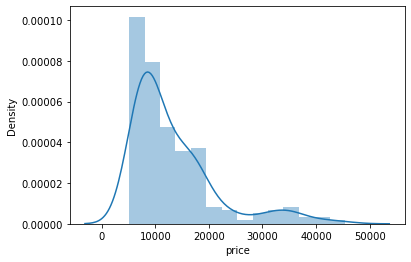

In [14]:
sns.distplot(df['price'])

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

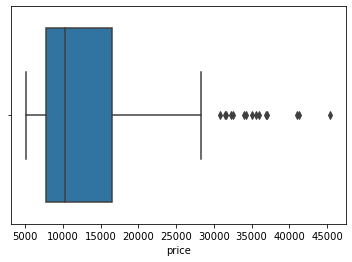

In [16]:
sns.boxplot(df['price'])

### Applying transformation to target variable Price

<AxesSubplot:ylabel='Density'>

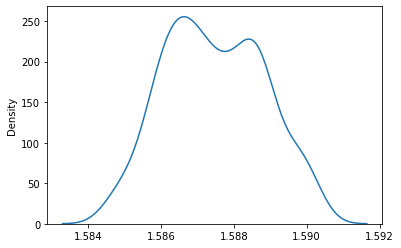

In [206]:
sns.kdeplot(stats.boxcox(df['price'])[0])

### Checking linear relationship of numerical columns with dependent variable price

In [13]:
num=df.select_dtypes(include=np.number)

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


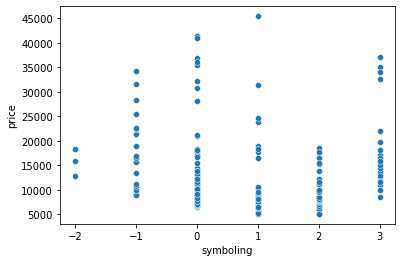

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


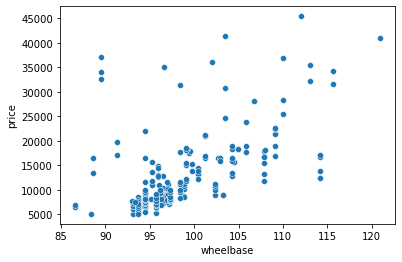

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


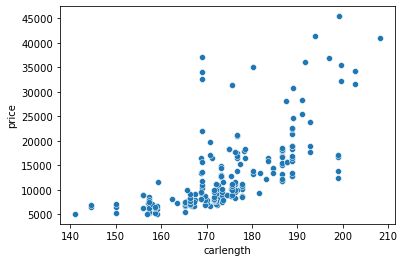

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


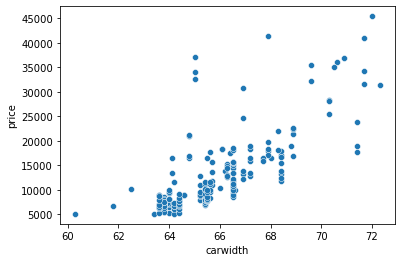

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


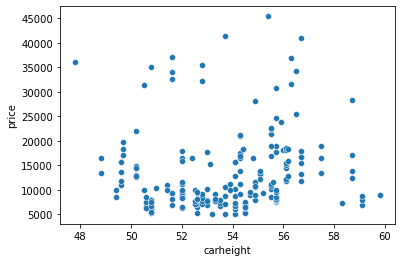

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


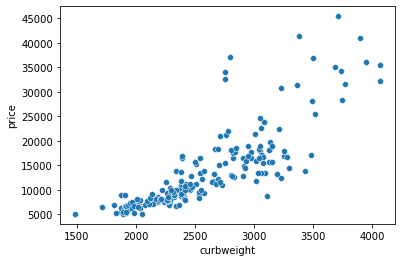

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


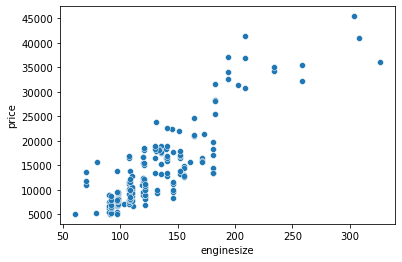

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


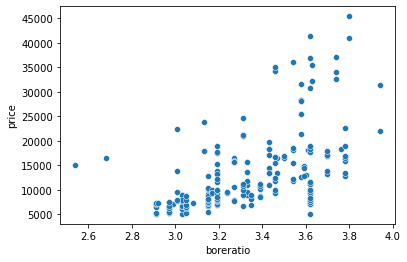

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


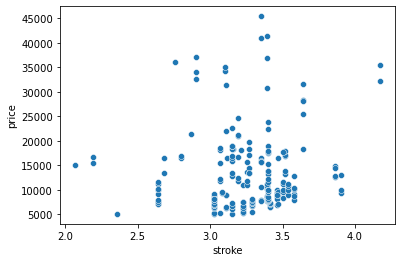

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


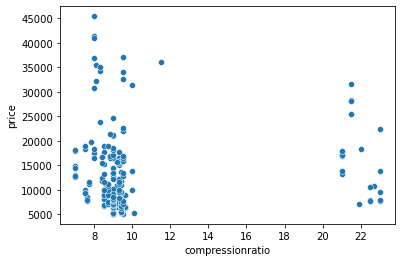

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


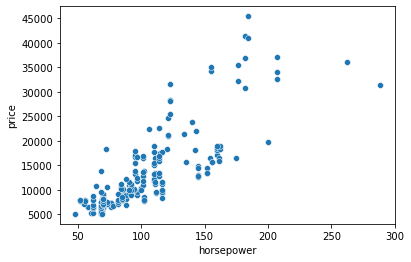

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


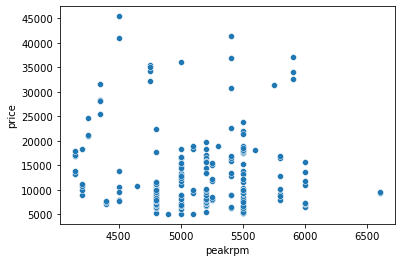

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


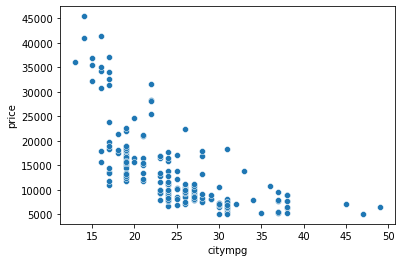

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


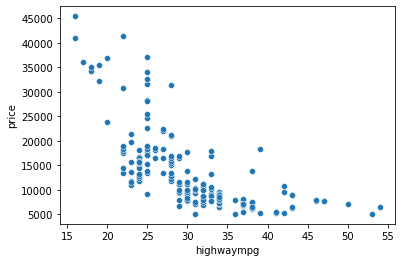

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


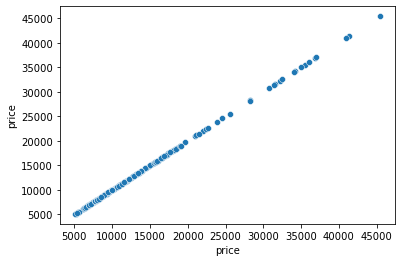

In [11]:
for i in num.columns:
    sns.scatterplot(df[i],df['price'])
    plt.show()

### Checking Multicolleniarity

<AxesSubplot:>

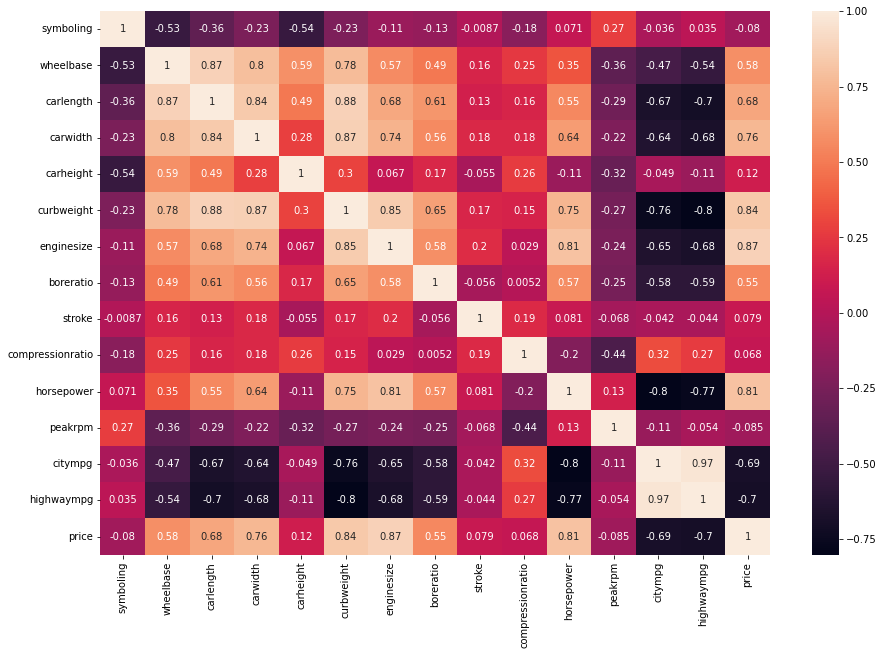

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True)

citympg and highwaympg shows highly negative correlation
horsepower,enginesize,curbweight,carwidth and carlength shows highly positive correlation.

In [12]:
num1=num.drop('price',axis=1)
vif=pd.DataFrame()
vif['features']=num1.columns
vif['VIF']=[variance_inflation_factor(num1.values,i) for i in range(num1.shape[1])]
vif

,features,VIF
0,symboling,2.540920
1,wheelbase,2254.716977
2,carlength,1893.738263
3,carwidth,2828.144983
4,carheight,929.458469
5,curbweight,403.471933
6,enginesize,68.872234
7,boreratio,291.357019
8,stroke,126.412487
9,compressionratio,15.834999


### Univariate Analysis

In [15]:
cat=df.select_dtypes(include=object)

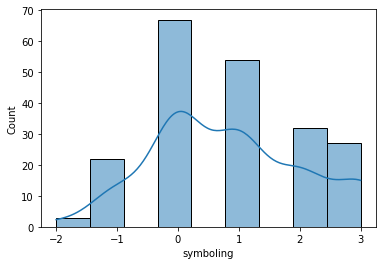

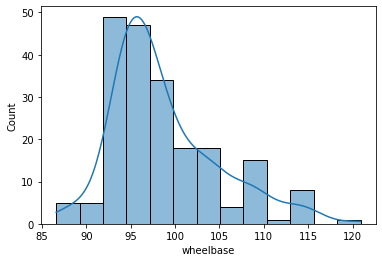

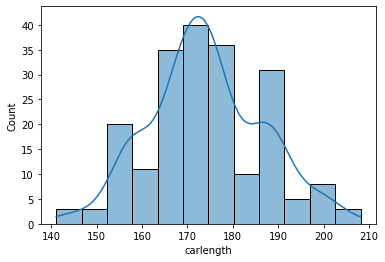

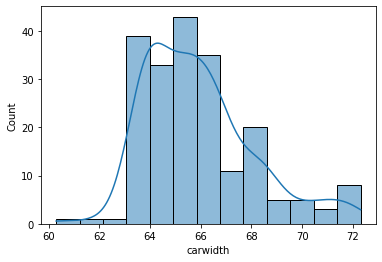

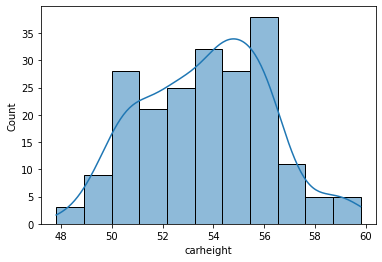

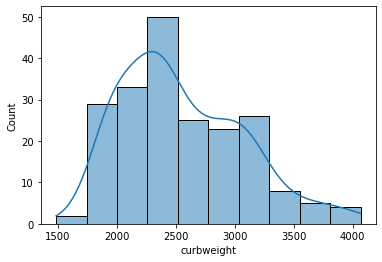

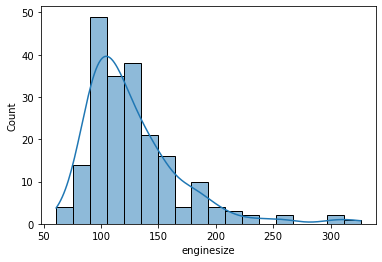

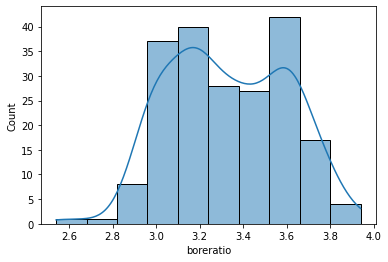

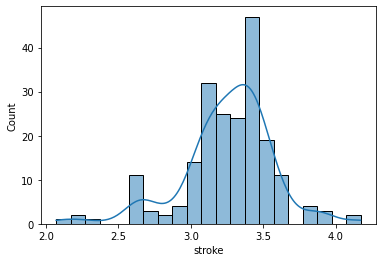

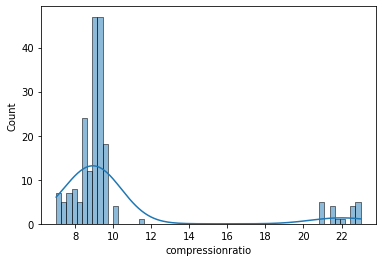

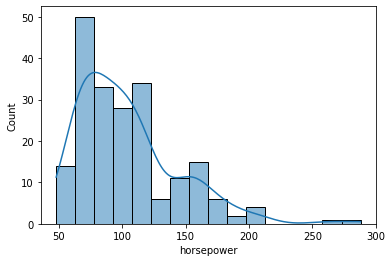

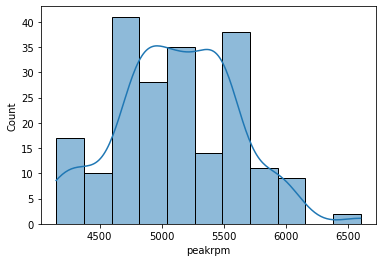

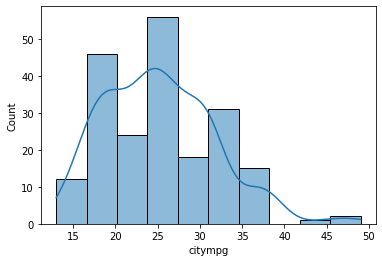

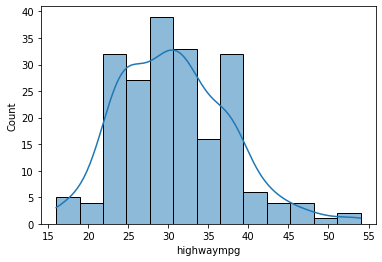

In [16]:
for i in num.drop('price',axis=1).columns:
    sns.histplot(df[i],kde=True)
    plt.show()

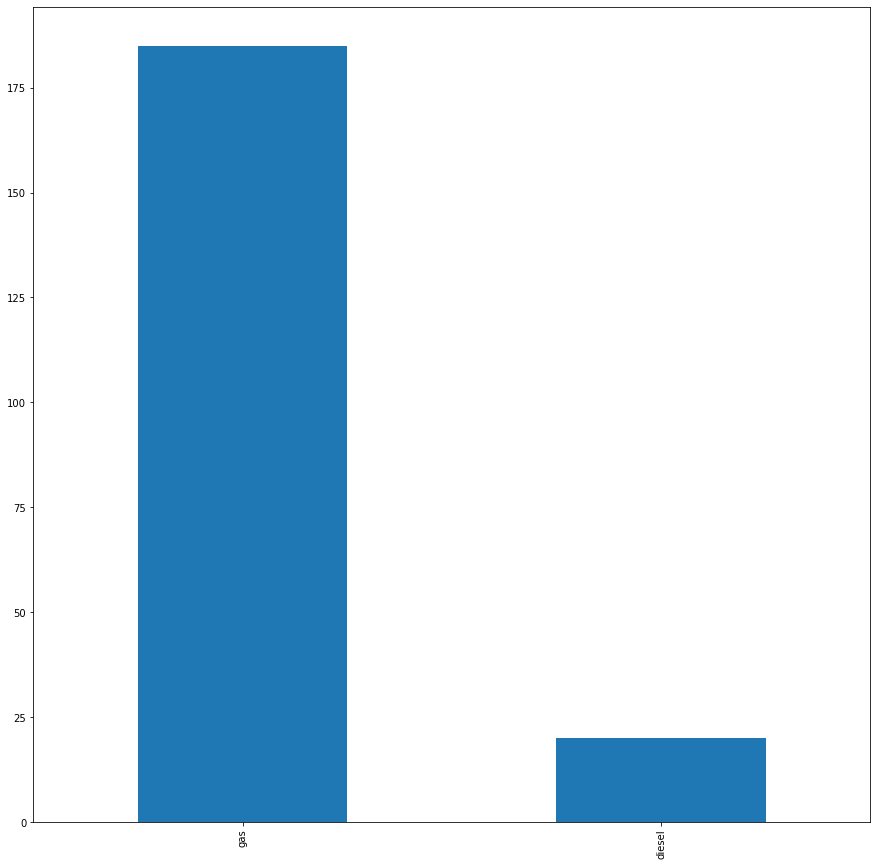

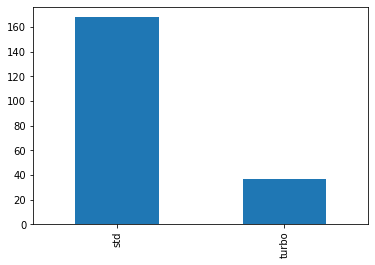

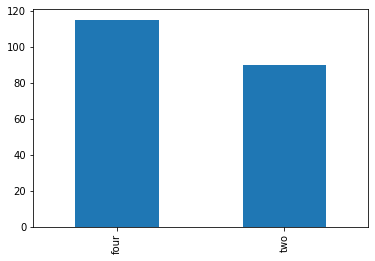

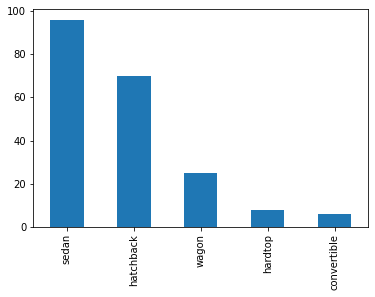

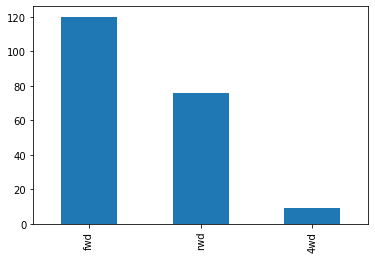

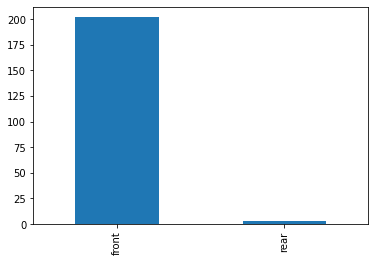

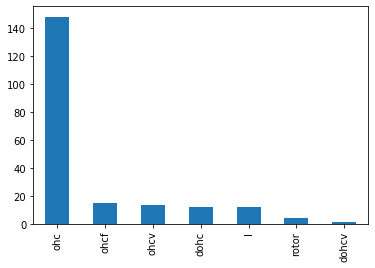

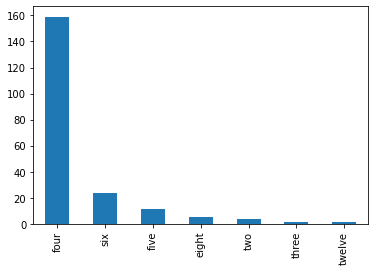

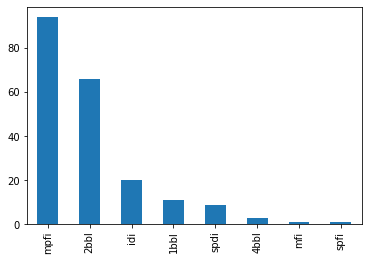

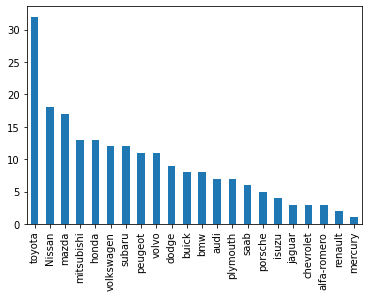

In [223]:
plt.figure(figsize=(15,15))
for i in cat.columns:
    df[i].value_counts().plot.bar()
    plt.show()

### Bivariate Analysis

<Figure size 1080x1440 with 0 Axes>

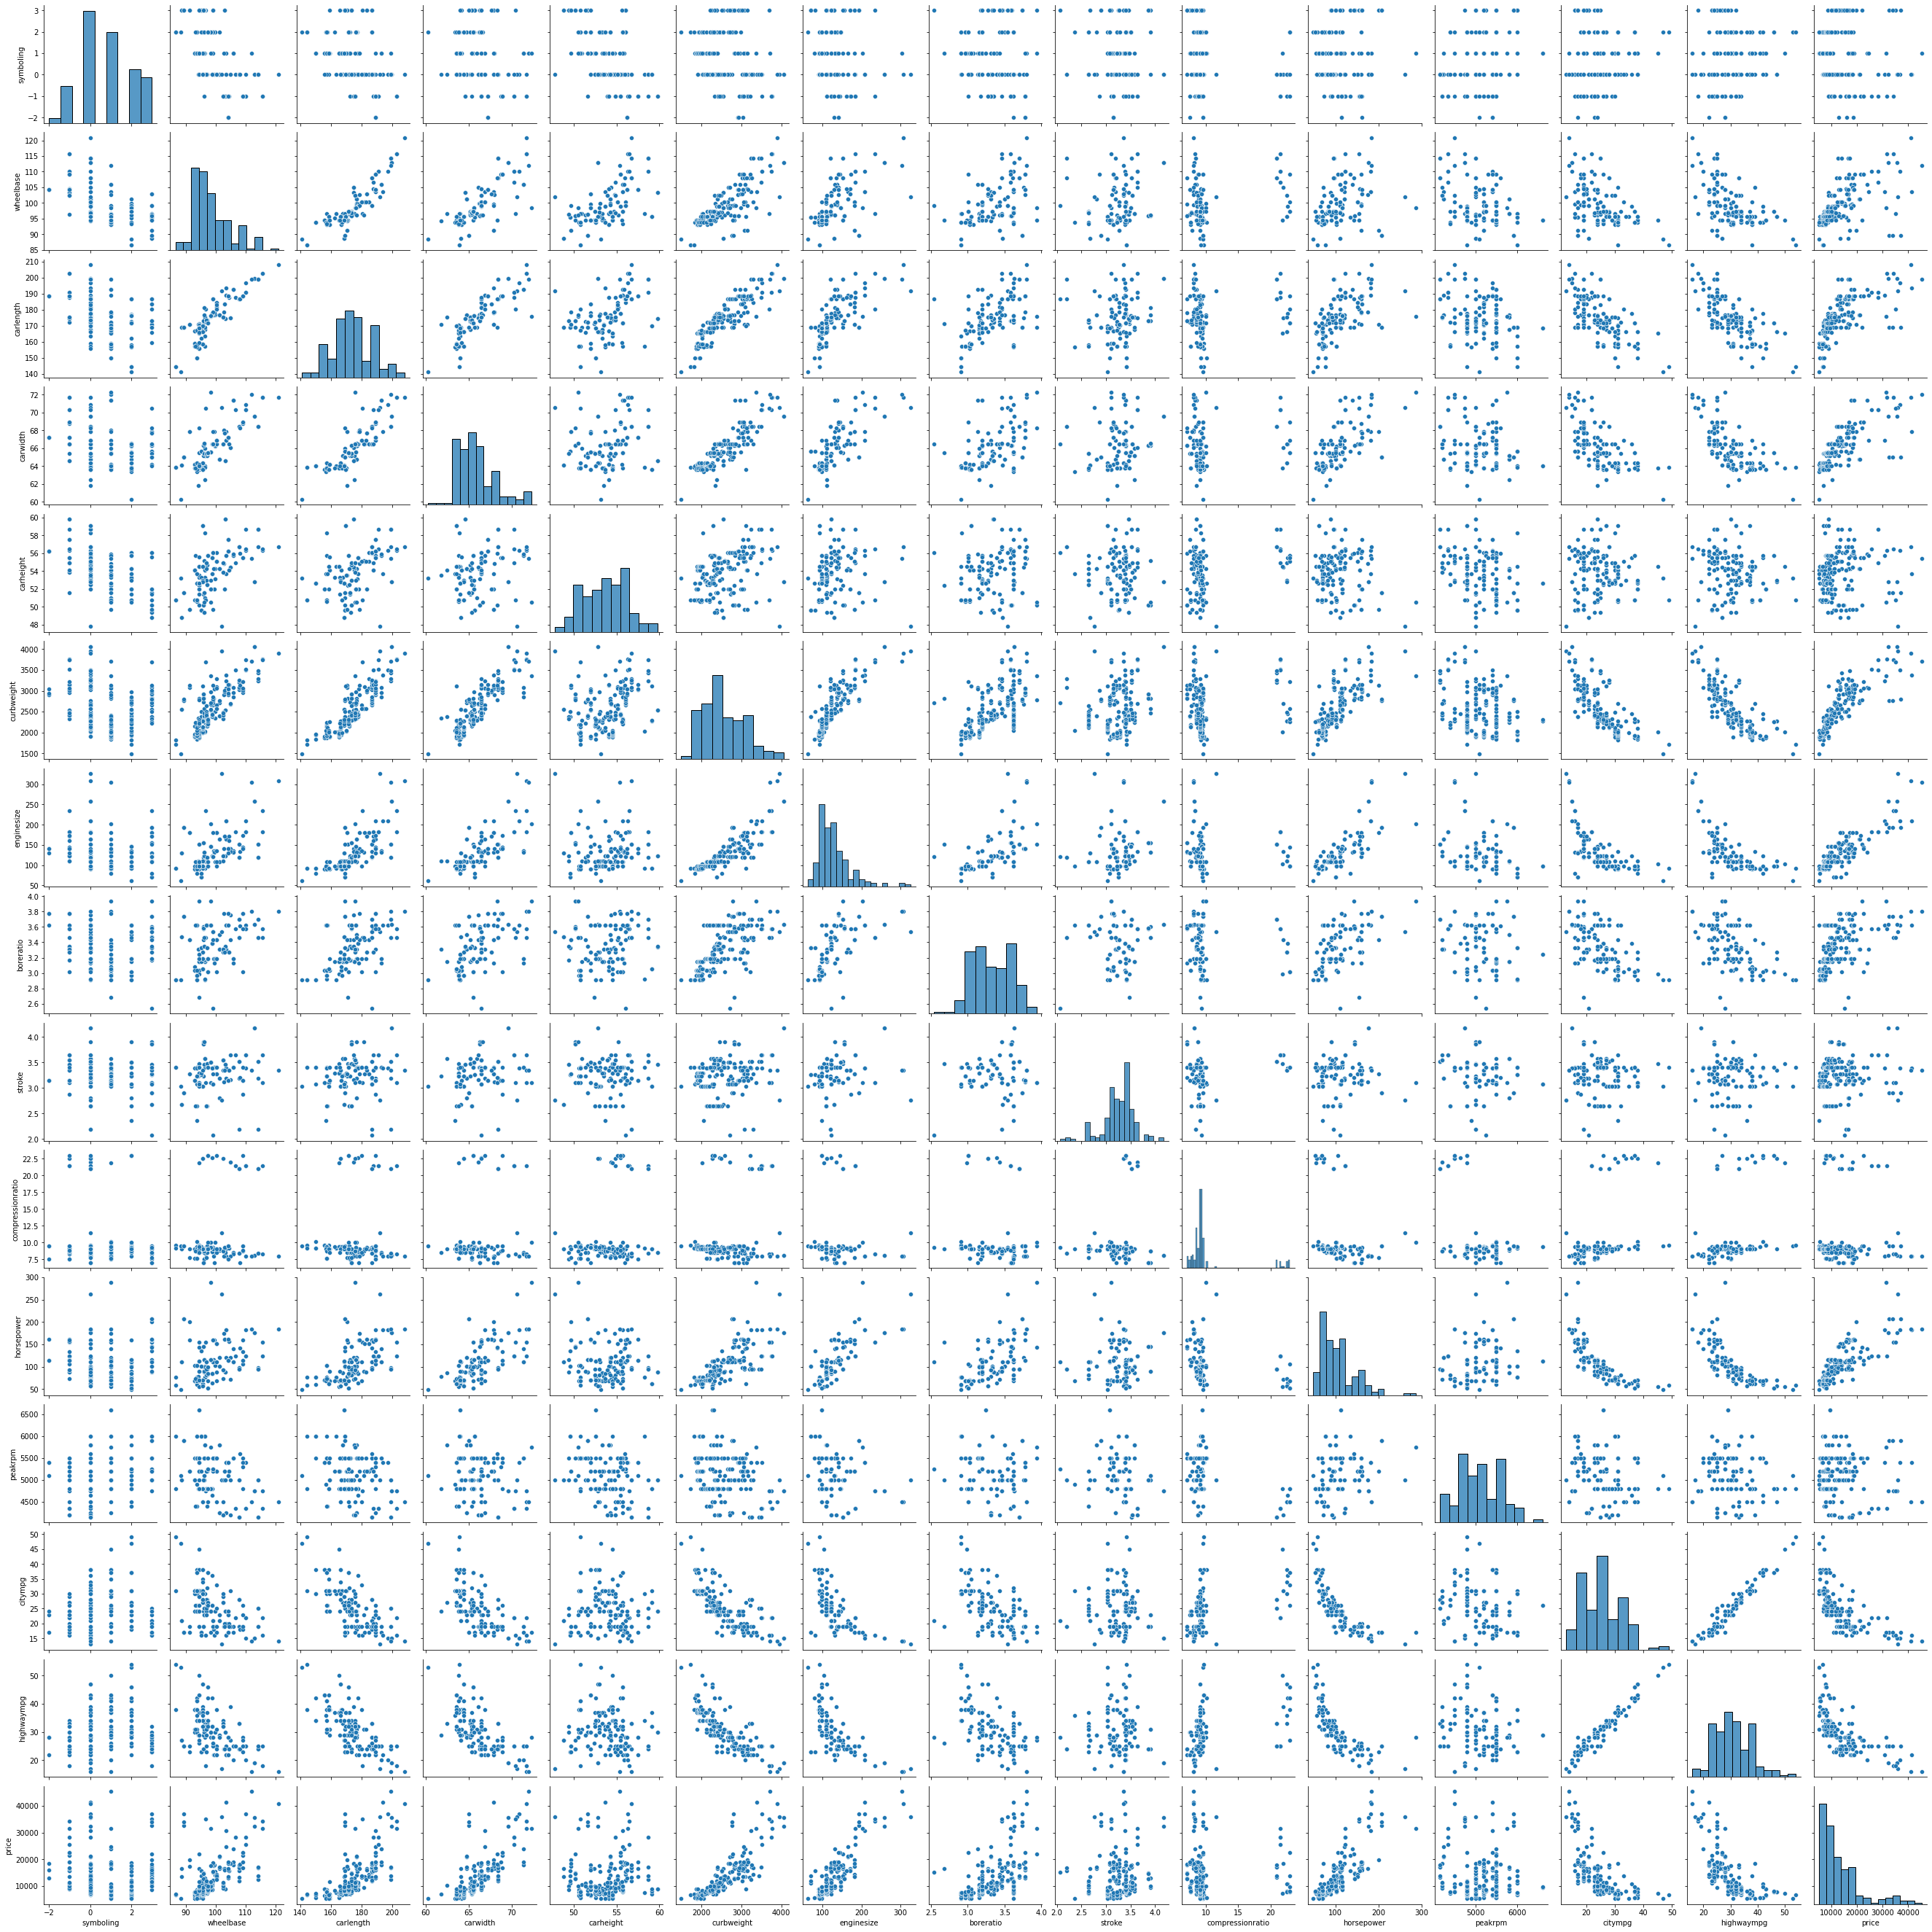

In [19]:
plt.figure(figsize=(15,20))
sns.pairplot(num)

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


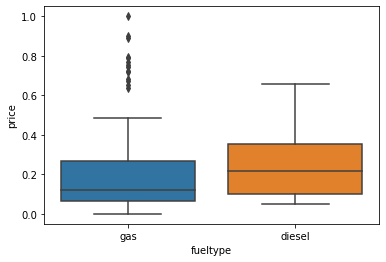

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


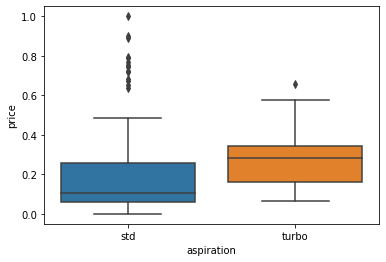

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


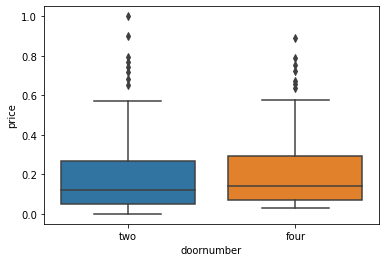

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


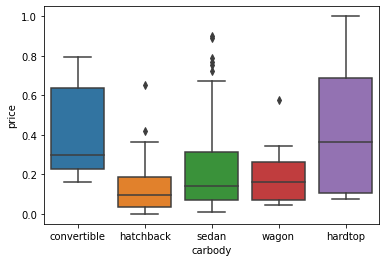

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


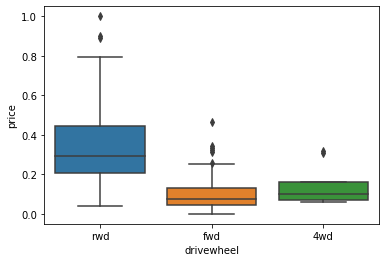

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


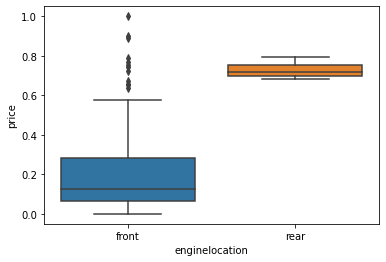

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


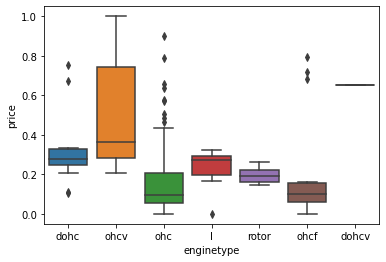

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


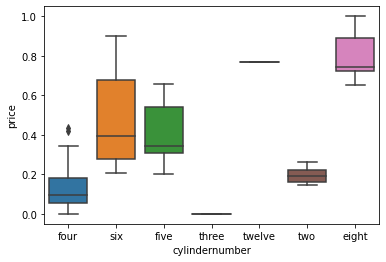

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


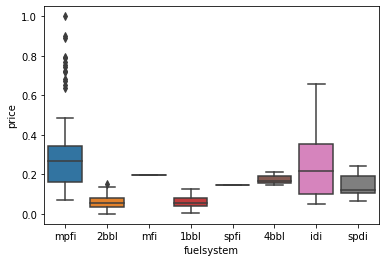

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


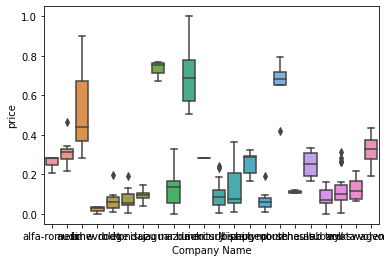

In [225]:
for i in cat.columns:
    sns.boxplot(df[i],df['price'])
    plt.show()

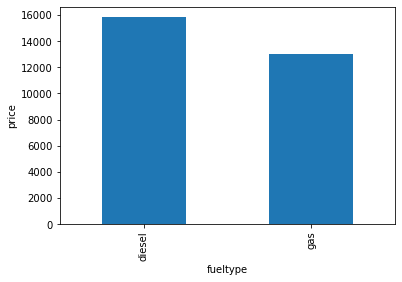

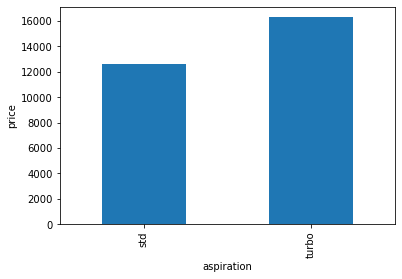

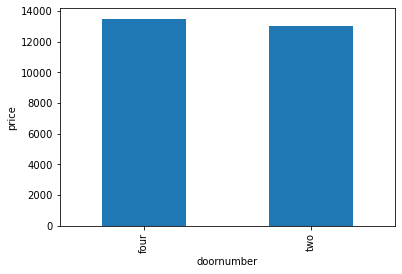

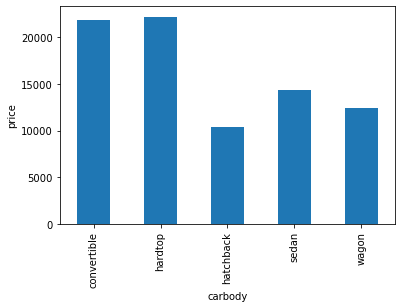

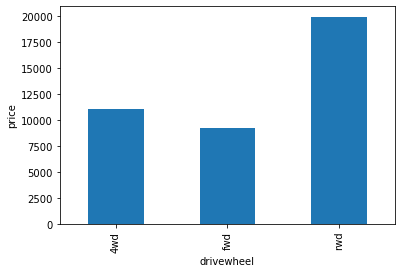

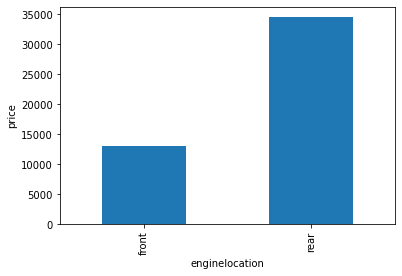

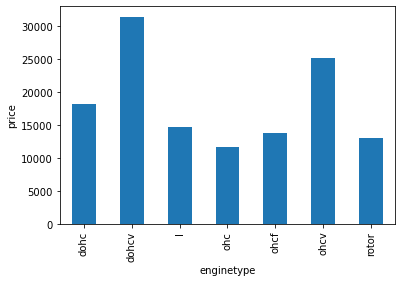

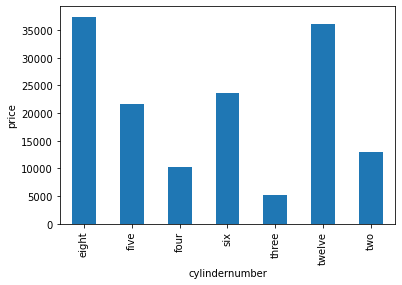

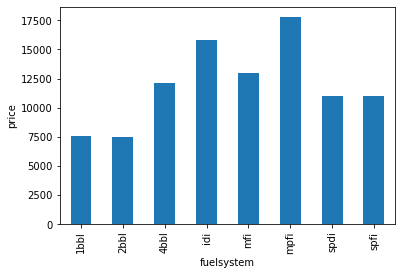

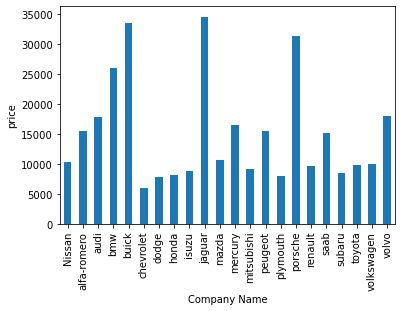

In [17]:
for i in cat.columns:
    df.groupby(i).price.mean().plot.bar()
    plt.ylabel('price')
    plt.show()

Car price for diesel is more than gas.
aspiration with turbo have higher price range than the std
door number does not show any major inference wrt price.
hardtop and convertible have higher average price.
Most of the high ranged cars seeme to prefer rwd drivewheel.
rear enginelocation has higher price than front engine location
Most of the high ranged cars have dohcv enginetype.
cars with eight cylinders have highest price range
Most of the high ranged cars have dohcv enginetype.
jaguar and buick make the most expensive cars.

### Feature Engineering

In [20]:
df1=df.copy()

In [21]:
df['mpg']=(df['citympg']+df['highwaympg'])/2

In [22]:
df.drop(['citympg','highwaympg'],axis=1,inplace=True)

In [23]:
df['Square footage']=round((df['carlength']*df['carwidth']),2)
df['Square footage']

0      10820.08
1      10820.08
2      11213.60
3      11690.92
4      11726.24
         ...   
200    13008.32
201    12989.44
202    13008.32
203    13008.32
204    13008.32
Name: Square footage, Length: 205, dtype: float64

In [24]:
df.drop(['carlength','carwidth'],axis=1,inplace=True)

In [25]:
df.groupby('Company Name')['Square footage','price'].mean().sort_values(by='price',ascending=False)

C:\Users\nidhi-jaiswal\AppData\Local\Temp\ipykernel_31644\1105780377.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Company Name')['Square footage','price'].mean().sort_values(by='price',ascending=False)


,Square footage,price
Company Name,,
jaguar,13772.780000,34600.000000
buick,13881.118750,33647.000000
porsche,11434.896000,31400.500000
bmw,12280.135000,26118.750000
volvo,12831.534545,18063.181818
audi,12649.752857,17859.166714
mercury,12131.200000,16503.000000
alfa-romero,10951.253333,15498.333333
peugeot,13072.030000,15489.090909


In [26]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Company Name,mpg,Square footage
0,3,gas,std,two,convertible,rwd,front,88.6,48.8,2548,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,10820.08
1,3,gas,std,two,convertible,rwd,front,88.6,48.8,2548,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,10820.08
2,1,gas,std,two,hatchback,rwd,front,94.5,52.4,2823,...,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5,11213.60
3,2,gas,std,four,sedan,fwd,front,99.8,54.3,2337,...,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0,11690.92
4,2,gas,std,four,sedan,4wd,front,99.4,54.3,2824,...,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0,11726.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,55.5,2952,...,mpfi,3.78,3.15,9.5,114,5400,16845.0,volvo,25.5,13008.32
201,-1,gas,turbo,four,sedan,rwd,front,109.1,55.5,3049,...,mpfi,3.78,3.15,8.7,160,5300,19045.0,volvo,22.0,12989.44
202,-1,gas,std,four,sedan,rwd,front,109.1,55.5,3012,...,mpfi,3.58,2.87,8.8,134,5500,21485.0,volvo,20.5,13008.32
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,55.5,3217,...,idi,3.01,3.40,23.0,106,4800,22470.0,volvo,26.5,13008.32


### Encoding Categorical variables

In [27]:
cat=df[['fueltype','aspiration','doornumber', 'drivewheel','enginelocation','cylindernumber']]

In [28]:
dc=pd.get_dummies(cat,drop_first=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['Company Name','enginetype','fuelsystem','carbody']]=df[['Company Name','enginetype','fuelsystem','carbody']].apply(le.fit_transform)

In [30]:
df=pd.concat((df,dc),axis=1)

In [31]:
df.drop(cat,axis=1,inplace=True)

In [32]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3.00,3.00,1.00,2.00,2.00,2.00,1.00,1.00,1.00,0.000,...,-1.00,-2.00,-1.00,-2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
carbody,0.00,0.00,2.00,3.00,3.00,3.00,3.00,4.00,3.00,2.000,...,4.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00
wheelbase,88.60,88.60,94.50,99.80,99.40,99.80,105.80,105.80,105.80,99.500,...,104.30,104.30,104.30,104.30,104.30,109.10,109.10,109.10,109.10,109.10
carheight,48.80,48.80,52.40,54.30,54.30,53.10,55.70,55.70,55.90,52.000,...,57.50,56.20,57.50,56.20,57.50,55.50,55.50,55.50,55.50,55.50
curbweight,2548.00,2548.00,2823.00,2337.00,2824.00,2507.00,2844.00,2954.00,3086.00,3053.000,...,3034.00,2935.00,3042.00,3045.00,3157.00,2952.00,3049.00,3012.00,3217.00,3062.00
enginetype,0.00,0.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.000,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,5.00,3.00,3.00
enginesize,130.00,130.00,152.00,109.00,136.00,136.00,136.00,136.00,131.00,131.000,...,141.00,141.00,141.00,130.00,130.00,141.00,141.00,173.00,145.00,141.00
fuelsystem,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.000,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3.00,5.00
boreratio,3.47,3.47,2.68,3.19,3.19,3.19,3.19,3.19,3.13,3.130,...,3.78,3.78,3.78,3.62,3.62,3.78,3.78,3.58,3.01,3.78
stroke,2.68,2.68,3.47,3.40,3.40,3.40,3.40,3.40,3.40,3.400,...,3.15,3.15,3.15,3.15,3.15,3.15,3.15,2.87,3.40,3.15


### Scaling Numerical Variables

In [33]:
sc=MinMaxScaler()

In [34]:
num=df.select_dtypes(include=np.number)
df[num.columns]

,symboling,carbody,wheelbase,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,...,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,0,88.6,48.8,2548,0,130,5,3.47,2.68,...,1,0,1,0,0,1,0,0,0,0
1,3,0,88.6,48.8,2548,0,130,5,3.47,2.68,...,1,0,1,0,0,1,0,0,0,0
2,1,2,94.5,52.4,2823,5,152,5,2.68,3.47,...,1,0,1,0,0,0,1,0,0,0
3,2,3,99.8,54.3,2337,3,109,5,3.19,3.40,...,0,1,0,0,0,1,0,0,0,0
4,2,3,99.4,54.3,2824,3,136,5,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,3,109.1,55.5,2952,3,141,5,3.78,3.15,...,0,0,1,0,0,1,0,0,0,0
201,-1,3,109.1,55.5,3049,3,141,5,3.78,3.15,...,0,0,1,0,0,1,0,0,0,0
202,-1,3,109.1,55.5,3012,5,173,5,3.58,2.87,...,0,0,1,0,0,0,1,0,0,0
203,-1,3,109.1,55.5,3217,3,145,3,3.01,3.40,...,0,0,1,0,0,0,1,0,0,0


In [35]:
df[num.columns]=sc.fit_transform(df[num.columns])

In [36]:
df

,symboling,carbody,wheelbase,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,...,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1.0,0.00,0.058309,0.083333,0.411171,0.000000,0.260377,0.714286,0.664286,0.290476,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.00,0.058309,0.083333,0.411171,0.000000,0.260377,0.714286,0.664286,0.290476,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.6,0.50,0.230321,0.383333,0.517843,0.833333,0.343396,0.714286,0.100000,0.666667,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.8,0.75,0.384840,0.541667,0.329325,0.500000,0.181132,0.714286,0.464286,0.633333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.8,0.75,0.373178,0.541667,0.518231,0.500000,0.283019,0.714286,0.464286,0.633333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.75,0.655977,0.641667,0.567882,0.500000,0.301887,0.714286,0.885714,0.514286,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
201,0.2,0.75,0.655977,0.641667,0.605508,0.500000,0.301887,0.714286,0.885714,0.514286,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
202,0.2,0.75,0.655977,0.641667,0.591156,0.833333,0.422642,0.714286,0.742857,0.380952,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
203,0.2,0.75,0.655977,0.641667,0.670675,0.500000,0.316981,0.428571,0.335714,0.633333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    float64
 1   carbody                205 non-null    float64
 2   wheelbase              205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    float64
 5   enginetype             205 non-null    float64
 6   enginesize             205 non-null    float64
 7   fuelsystem             205 non-null    float64
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    float64
 12  peakrpm                205 non-null    float64
 13  price                  205 non-null    float64
 14  Company Name           205 non-null    float64
 15  mpg   

### Splitting data int train and test

In [38]:
X=df.drop('price',axis=1)
y=df['price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=45)

### Model buidling

In [39]:
X=df.drop('price',axis=1)
y=df['price']
Xc=sm.add_constant(X)
xtrain,xtest,ytrain,ytest=train_test_split(Xc,y,random_state=45)
smodel=sm.OLS(ytrain,xtrain).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     38.69
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.66e-48
Time:                        19:32:59   Log-Likelihood:                 200.89
No. Observations:                 153   AIC:                            -343.8
Df Residuals:                     124   BIC:                            -255.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1660      0.267      0.622      0.535      -0.362       0.694
symboling                 0.0036      0.045      0.080      0.936      -0.085       0.092
carbody                  -0.0698      0.047     -1.489      0.139      -0.163       0.023
wheelbase                 0.1295      0.126      1.029      0.305      -0.120       0.379
carheight                 0.0477      0.050      0.947      0.346      -0.052       0.147
curbweight               -0.0335      0.169     -0.198      0.843      -0.367       0.300
enginetype               -0.0521      0.046     -1.142      0.256      -0.142       0.038
enginesize                0.7422      0.227      3.275      0.001       0.294       1.191
fuelsystem               -0.0022      0.035     -0.065      0.949      -0.071       0.066
boreratio                -0.0378      0.068     -0.559      0.577      -0.172       0.096
stroke                   -0.1462      0.060     -2.430      0.017      -0.265      -0.027
compressionratio         -0.1395      0.246     -0.567      0.572      -0.627       0.348
horsepower                0.1875      0.145      1.290      0.199      -0.100       0.475
peakrpm                   0.0927      0.051      1.826      0.070      -0.008       0.193
Company Name             -0.0474      0.023     -2.023      0.045      -0.094      -0.001
mpg                       0.0999      0.095      1.054      0.294      -0.088       0.287
Square footage            0.1775      0.141      1.257      0.211      -0.102       0.457
fueltype_gas             -0.1435      0.209     -0.686      0.494      -0.557       0.270
aspiration_turbo          0.0216      0.029      0.756      0.451      -0.035       0.078
doornumber_two           -0.0128      0.020     -0.623      0.535      -0.053       0.028
drivewheel_fwd           -0.0248      0.041     -0.604      0.547      -0.106       0.056
drivewheel_rwd            0.0199      0.041      0.482      0.631      -0.062       0.102
enginelocation_rear       0.2747      0.066      4.171      0.000       0.144       0.405
cylindernumber_five       0.0177      0.086      0.205      0.838      -0.153       0.189
cylindernumber_four      -0.0524      0.092     -0.567      0.572      -0.235       0.130
cylindernumber_six       -0.0410      0.062     -0.666      0.507      -0.163       0.081
cylindernumber_three      0.0156      0.133      0.117      0.907      -0.248       0.279
cylindernumber_twelve    -0.1392      0.135     -1.028      0.306      -0.407       0.129
cylindernumber_two        0.1258      0.132      0.953      0.342      -0.135       0.387
==============================================================================
Omnibus:                       42.650   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarqu

In [40]:
ypred=smodel.predict(xtrain)
ypred1=smodel.predict(xtest)

In [41]:
r2_score(ypred,ytrain)

0.8855335646553271

In [42]:
r2_score(ypred1,ytest)

0.8956859473729187

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
lr=LinearRegression()
sf=SequentialFeatureSelector(estimator=lr,cv=5,k_features=10,scoring='r2',forward=False)
sfmodel=sf.fit(xtrain,ytrain)
print(sfmodel.k_feature_names_)
print(sfmodel.k_score_)

('enginesize', 'peakrpm', 'Company Name', 'Square footage', 'aspiration_turbo', 'drivewheel_fwd', 'enginelocation_rear', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six')
0.8470682646905872


In [44]:
X=df[['enginesize', 'boreratio', 'stroke', 'peakrpm', 'mpg', 'Square footage', 'drivewheel_rwd', 'enginelocation_rear', 'cylindernumber_five', 'cylindernumber_two']]
y=df['price']
X=sm.add_constant(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=45)
smodel=sm.OLS(ytrain,xtrain).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     96.61
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.14e-58
Time:                        19:33:24   Log-Likelihood:                 183.97
No. Observations:                 153   AIC:                            -345.9
Df Residuals:                     142   BIC:                            -312.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1487      0.062     -2.386      0.018      -0.272      -0.025
enginesize              0.7942      0.077     10.336      0.000       0.642       0.946
boreratio              -0.0511      0.046     -1.114      0.267      -0.142       0.040
stroke                 -0.0887      0.045     -1.979      0.050      -0.177      -0.000
peakrpm                 0.0907      0.039      2.327      0.021       0.014       0.168
mpg                     0.0489      0.061      0.801      0.424      -0.072       0.169
Square footage          0.3034      0.068      4.445      0.000       0.168       0.438
drivewheel_rwd          0.0621      0.018      3.466      0.001       0.027       0.098
enginelocation_rear     0.3072      0.053      5.788      0.000       0.202       0.412
cylindernumber_five     0.0855      0.033      2.599      0.010       0.020       0.151
cylindernumber_two      0.1150      0.052      2.214      0.028       0.012       0.218
==============================================================================
Omnibus:                       31.861   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.370
Skew:                           0.775   Prob(JB):                     5.31e-21
Kurtosis:                       6.499   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
ypred=smodel.predict(xtrain)
ypred1=smodel.predict(xtest)

In [46]:
print('train score :',r2_score(ypred,ytrain))
print('test score :',r2_score(ypred1,ytest))

train score : 0.8530206204443556
test score : 0.8451585917867217


### Final Model

In [47]:
X=df[['enginetype','enginesize', 'stroke', 'Square footage', 'enginelocation_rear', 'cylindernumber_four', 'cylindernumber_six']]
y=df['price']
X=sm.add_constant(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=45)
smodel=sm.OLS(ytrain,xtrain).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.01e-59
Time:                        19:33:42   Log-Likelihood:                 179.12
No. Observations:                 153   AIC:                            -342.2
Df Residuals:                     145   BIC:                            -318.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0694      0.053      1.320      0.189      -0.034       0.173
enginetype             -0.0754      0.038     -2.006      0.047      -0.150      -0.001
enginesize              0.6283      0.073      8.574      0.000       0.483       0.773
stroke                 -0.0791      0.044     -1.778      0.078      -0.167       0.009
Square footage          0.3294      0.056      5.884      0.000       0.219       0.440
enginelocation_rear     0.3530      0.052      6.838      0.000       0.251       0.455
cylindernumber_four    -0.1219      0.024     -5.105      0.000      -0.169      -0.075
cylindernumber_six     -0.0530      0.028     -1.898      0.060      -0.108       0.002
==============================================================================
Omnibus:                       35.089   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.564
Skew:                           0.815   Prob(JB):                     4.88e-26
Kurtosis:                       6.953   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value is 0.863 which means model has an accuracy of 86% which is a good value.
Prob F stat value is 8.56e-53 which implies our model is significant

### Cross Validation

In [48]:
lr=LinearRegression()

In [49]:
lmodel=lr.fit(xtrain,ytrain)

In [50]:
lr.score(xtrain,ytrain)

0.8634689486157425

In [51]:
cross_val_score(estimator=lr,X=xtrain,y=ytrain,cv=5,scoring='r2')

array([0.75889219, 0.9151269 , 0.89534511, 0.77454123, 0.81431722])

### Predictions

In [52]:
ypred=smodel.predict(xtrain)
ypred1=smodel.predict(xtest)

In [53]:
print('train score :',r2_score(ypred,ytrain))
print('test score :',r2_score(ypred1,ytest))

train score : 0.8418807629352103
test score : 0.8332429736237275


No significant difference between train and test score which implies model is a general model.

### Evaluation in terms of Linear regression assumptions

<AxesSubplot:ylabel='Density'>

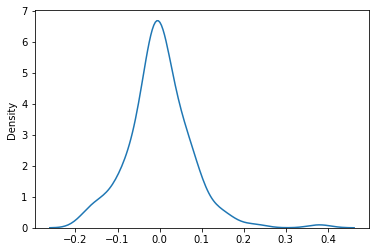

In [54]:
resid=smodel.resid
sns.kdeplot(resid)

In [55]:
stats.shapiro(smodel.resid)

ShapiroResult(statistic=0.9419599771499634, pvalue=6.123168986960081e-06)

Errors seems to be normally distributed so the assumption on the linear modeling seems to be fulfilled.

C:\Users\nidhi-jaiswal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

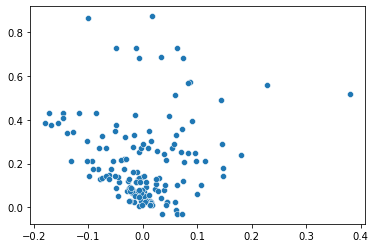

In [56]:
sns.scatterplot(smodel.resid,smodel.fittedvalues)

It is homoscedastic as residuals show constant variance.